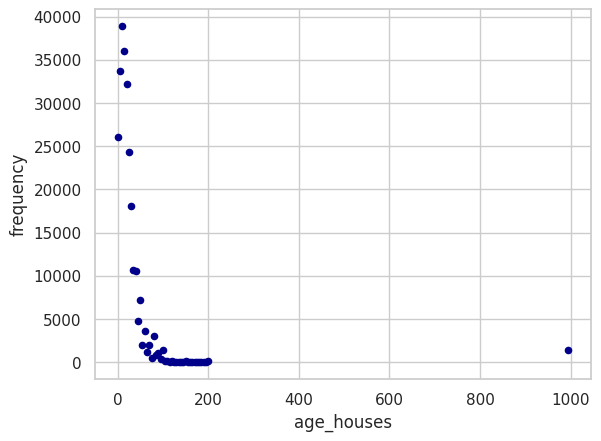

In [32]:
#no dar bola
df = pd.read_csv('train_values.csv',usecols=['building_id','age'])
df_ages = df.groupby('age').count().reset_index()
df_ages = df_ages.rename(columns={'age':'age_houses','building_id':'frequency'})
plot = df_ages.plot.scatter(x='age_houses',y='frequency',c='DarkBlue')

# Limpieza del dataset

In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [46]:
#datatypes explorer
df = pd.read_csv('train_values.csv',nrows=1,usecols=range(15,22))
df.head()
#df.memory_usage()

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber
0,1,1,0,0,0,0,0


Vamos a hacer una tabla de las columnas numericas, con sus mínimos y maximos
Después podemos ver si podemos llevarlos a un datatype más pequeño

In [40]:
df = pd.read_csv('train_values.csv',usecols=range(0,8))
pd.concat([df.min(),df.max()],axis=1).rename(columns={0:'min',1:'max'})

,min,max
building_id,4,1052934
geo_level_1_id,0,30
geo_level_2_id,0,1427
geo_level_3_id,0,12567
count_floors_pre_eq,1,9
age,0,995
area_percentage,1,100
height_percentage,2,32


Podemos ver que las primeras 8 se pueden castear a int32.

También la primera a int32 y las demás a int16. Sigo con las demas cols

---



In [57]:
df = pd.read_csv('train_values.csv',usecols=range(8,15))

De la 8 a la 15 (sin incluir son categoricos)

---

In [58]:
df = pd.read_csv('train_values.csv',usecols=range(15,22))
df.apply(pd.value_counts,axis=0)

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber
0,237500,62040,251654,255849,242840,240986,194151
1,23101,198561,8947,4752,17761,19615,66450
